# Підготовка та аналіз даних 
## Лабораторна робота №4
### Структури для роботи з великими обсягами даних в Python
### ФБ-21 Каюн Вероніка
<b>Мета роботи:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)



Датасет https://archive.ics.uci.edu/dataset/45/heart+disease

  # Рівень 2
  

In [23]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45) 

# Отримуємо дані у форматі NumPy array
X_np = np.array(heart_disease.data.features)
y_np = np.array(heart_disease.data.targets)

# Отримуємо дані у форматі DataFrame
X_df = heart_disease.data.features
y_df = heart_disease.data.targets

In [24]:
X_np

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.],
       [38.,  1.,  3., ...,  1., nan,  3.]])

In [25]:
X_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


1. Поборотися із зниклими даними.

In [26]:
# Кількість пропущених значень
count = X_df.isnull().sum()
print(count)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [27]:
# Заміна пропущених значень середнім значенням
df1 = X_df.fillna(X_df.mean())
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0


In [28]:
import numpy as np
# Заміна пропущених значень середнім значенням
arr1 = np.where(np.isnan(X_np), np.nanmean(X_np, axis=0), X_np)
arr1

array([[63.       ,  1.       ,  1.       , ...,  3.       ,  0.       ,
         6.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  3.       ,
         3.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  2.       ,
         7.       ],
       ...,
       [57.       ,  1.       ,  4.       , ...,  2.       ,  1.       ,
         7.       ],
       [57.       ,  0.       ,  2.       , ...,  2.       ,  1.       ,
         3.       ],
       [38.       ,  1.       ,  3.       , ...,  1.       ,  0.6722408,
         3.       ]])

2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [29]:
def norm_data(df1):
    min_val = df1.min(axis=0)
    max_val = df1.max(axis=0)
    norm_df = (df1 - min_val) / (max_val - min_val)
    return norm_df

df = norm_data(df1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00


In [30]:
def norm_array(arr1):
    min_val = np.nanmin(arr1)
    max_val = np.nanmax(arr1)
    norm_arr = (arr1 - min_val) / (max_val - min_val)
    return norm_arr

arr = norm_array(arr1)
arr

array([[0.11170213, 0.00177305, 0.00177305, ..., 0.00531915, 0.        ,
        0.0106383 ],
       [0.11879433, 0.00177305, 0.0070922 , ..., 0.0035461 , 0.00531915,
        0.00531915],
       [0.11879433, 0.00177305, 0.0070922 , ..., 0.0035461 , 0.0035461 ,
        0.01241135],
       ...,
       [0.10106383, 0.00177305, 0.0070922 , ..., 0.0035461 , 0.00177305,
        0.01241135],
       [0.10106383, 0.        , 0.0035461 , ..., 0.0035461 , 0.00177305,
        0.00531915],
       [0.06737589, 0.00177305, 0.00531915, ..., 0.00177305, 0.00119192,
        0.00531915]])

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

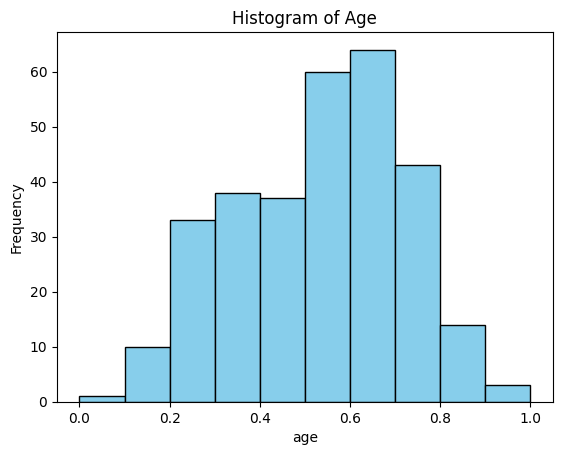

In [31]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()



4. Збудувати графік залежності одного integer/real атрибута від іншого.

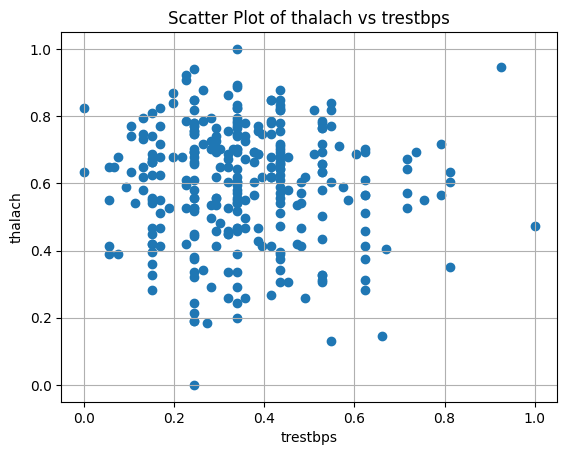

In [32]:
import matplotlib.pyplot as plt

x_attribute = 'trestbps'   
y_attribute = 'thalach'    

plt.scatter(df[x_attribute], df[y_attribute])

plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of {y_attribute} vs {x_attribute}')
plt.grid(True)
plt.show()


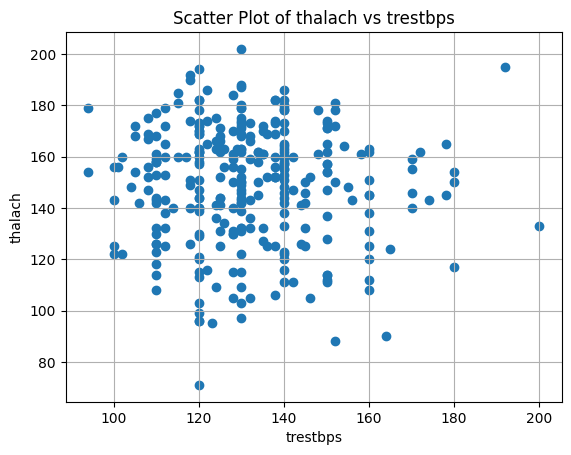

In [33]:
import matplotlib.pyplot as plt

x_attribute = 3   # Індекс стовпця "trestbps"
y_attribute = 7   # Індекс стовпця "thalach"

plt.scatter(X_np[:, x_attribute], X_np[:, y_attribute])

plt.xlabel("trestbps")
plt.ylabel("thalach")
plt.title("Scatter Plot of thalach vs trestbps")
plt.grid(True)
plt.show()


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [34]:
from scipy.stats import pearsonr, spearmanr

# Обчислення коефіцієнта Пірсона
pearson_corr_df = pearsonr(df['age'], df['chol'])
print("Коефіцієнт Пірсона (DataFrame):", pearson_corr_df[0])

# Обчислення коефіцієнта Спірмена
spearman_corr_df = spearmanr(df['age'], df['chol'])
print("Коефіцієнт Спірмена (DataFrame):", spearman_corr_df.correlation)




Коефіцієнт Пірсона (DataFrame): 0.20895026994678267
Коефіцієнт Спірмена (DataFrame): 0.19125299023684744


In [35]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Обчислення коефіцієнта Пірсона
pearson_corr_np = pearsonr(arr[:, 0], arr[:, 4])
print("Коефіцієнт Пірсона (NumPy):", pearson_corr_np[0])

# Обчислення коефіцієнта Спірмена
spearman_corr_np = spearmanr(arr[:, 0], arr[:, 4])
print("Коефіцієнт Спірмена (NumPy):", spearman_corr_np.correlation)


Коефіцієнт Пірсона (NumPy): 0.20895026994678276
Коефіцієнт Спірмена (NumPy): 0.19125299023684744


6. Провести One Hot Encoding категоріального string атрибуту.

In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
exang_encoded = encoder.fit_transform(df[['exang']])
exang_encoded_df = pd.DataFrame(exang_encoded.toarray(), columns=encoder.get_feature_names_out(['exang']))
df_encoded = pd.concat([df.drop('exang', axis=1), exang_encoded_df], axis=1)

df_encoded


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,exang_0.0,exang_1.0
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.370968,1.0,0.000000,0.75,1.0,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,0.241935,0.5,1.000000,0.00,0.0,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,0.419355,0.5,0.666667,1.00,0.0,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.564516,1.0,0.000000,0.00,1.0,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.225806,0.0,0.000000,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.193548,0.5,0.000000,1.00,1.0,0.0
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.548387,0.5,0.666667,1.00,1.0,0.0
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,0.193548,0.5,0.333333,1.00,0.0,1.0
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.000000,0.5,0.333333,0.00,1.0,0.0


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

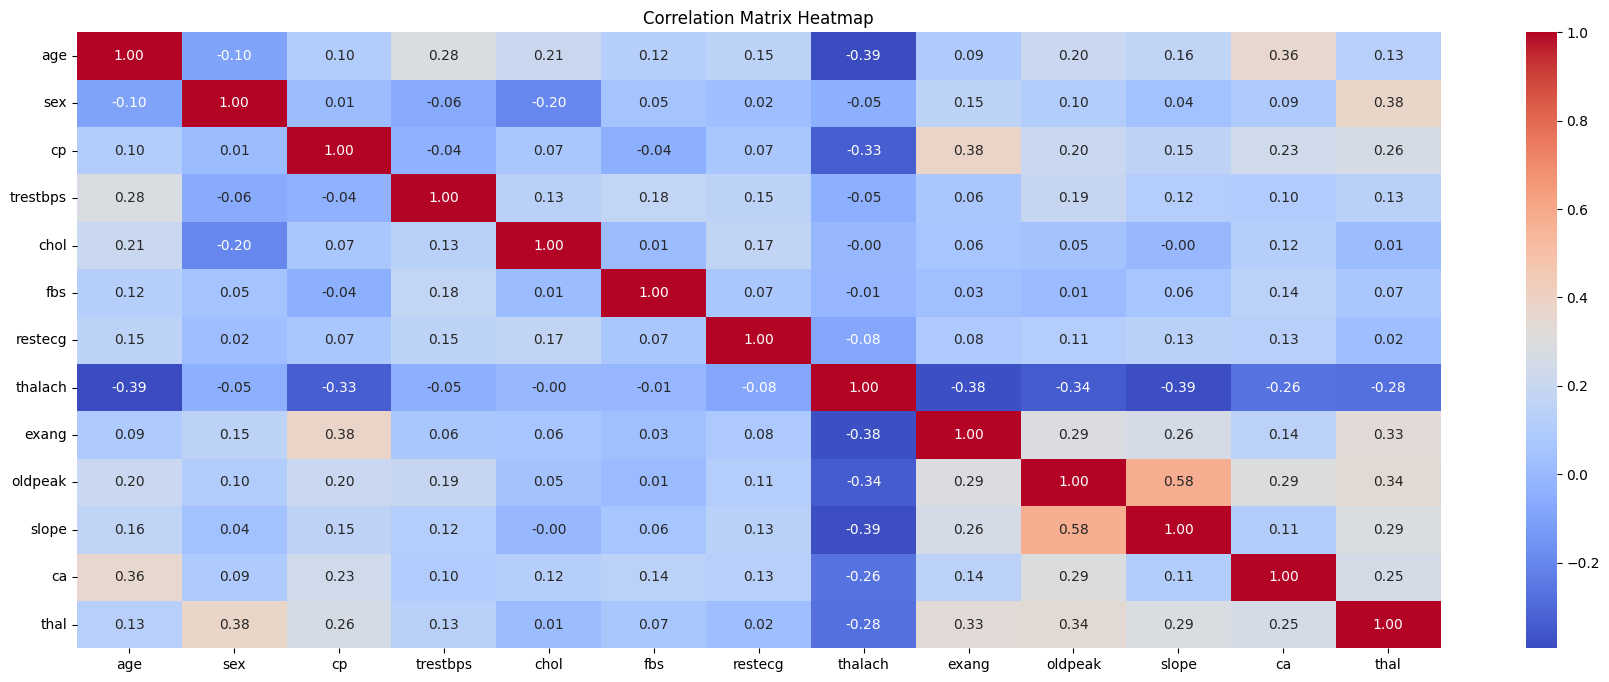

In [57]:
import seaborn as sns

# Теплова карта матриці кореляції
plt.figure(figsize=(22, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


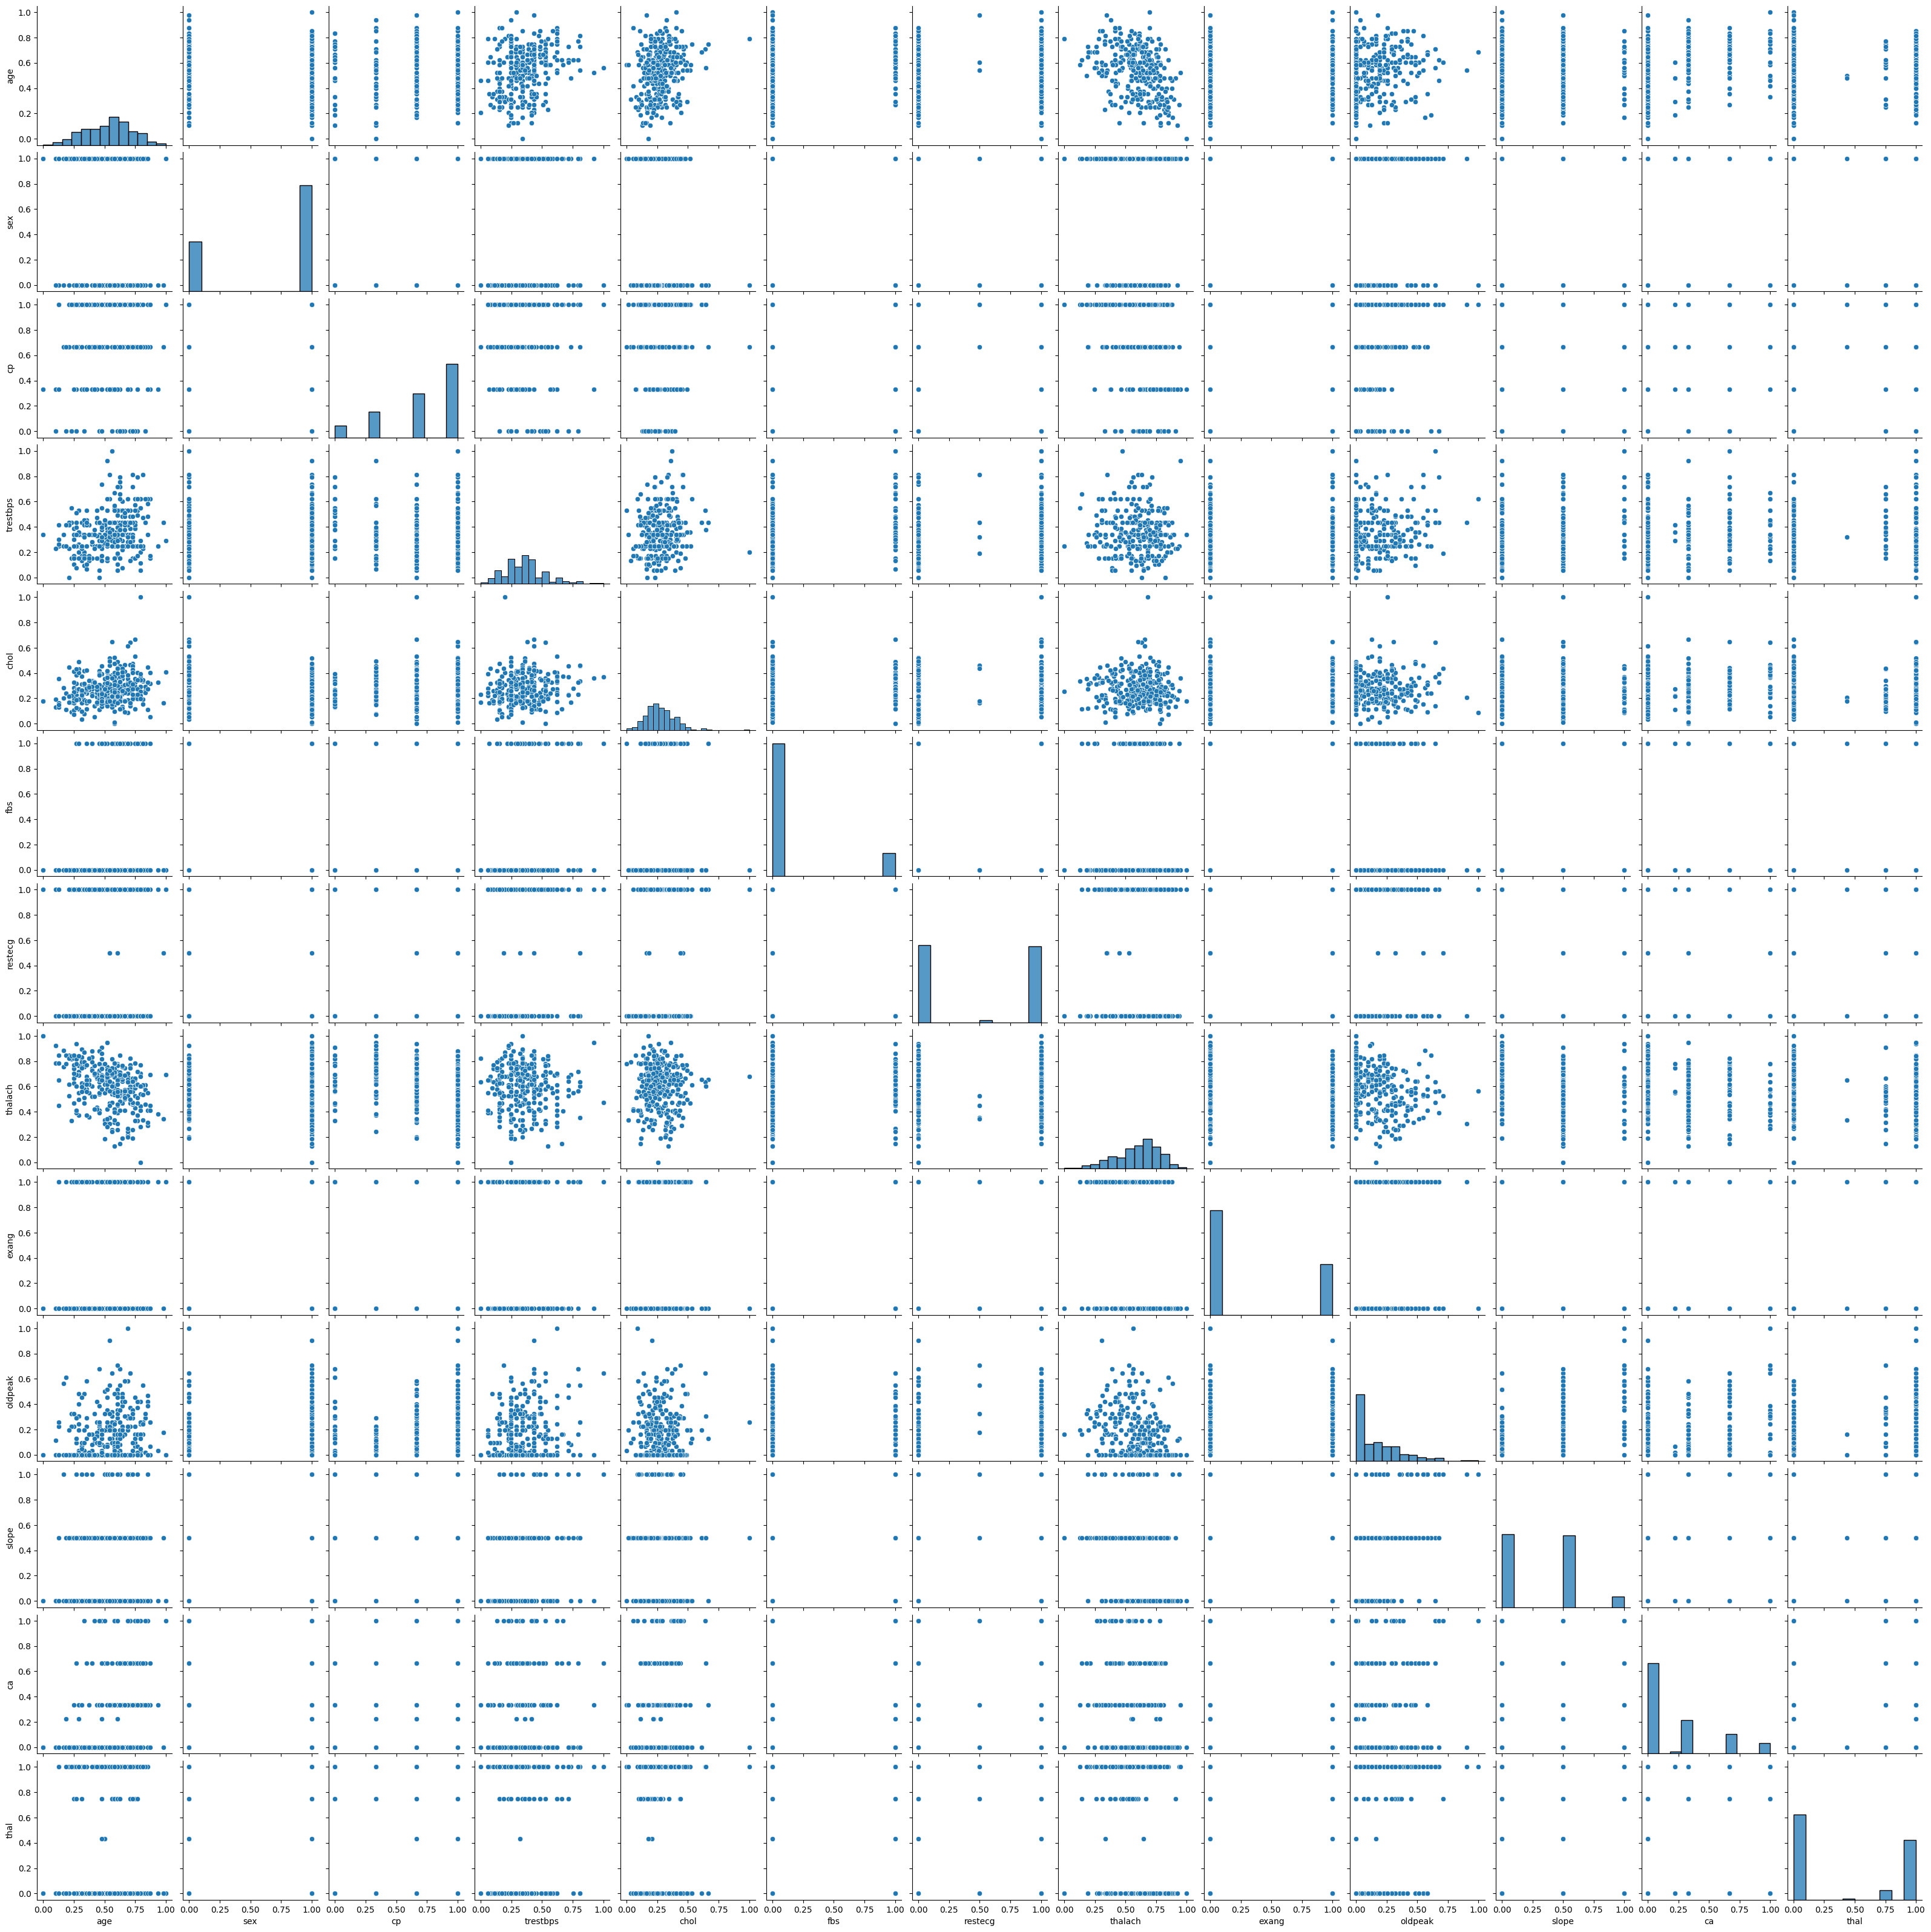

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
pp = sns.pairplot(df)
plt.show()


